In [1]:
# Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#Loading the dataset to a pandas dataframe

In [4]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
credit_card_data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188256,127893.0,-8.852104,-11.509369,0.449332,2.068166,5.423514,-4.506990,-3.722182,-0.343961,-1.255238,...,-1.390078,1.059268,5.788621,1.226642,1.186211,0.584517,1.783203,-0.400900,37.5,0.0
188257,127894.0,1.609287,-0.581437,0.008484,1.655629,-1.162795,-0.938786,-0.287847,-0.124818,0.855258,...,0.373621,0.902301,0.129504,0.858324,-0.281039,-0.628079,0.032977,0.003303,150.0,0.0
188258,127894.0,2.097886,-0.685229,-1.281921,-0.318993,-0.235987,-0.167462,-0.382762,-0.114099,-0.412410,...,-0.136930,0.381340,0.056371,0.740105,0.272978,-0.107836,0.016936,-0.057214,11.5,0.0
188259,127894.0,1.851731,-0.368532,0.157316,1.422273,-0.917616,-0.315417,-0.696940,0.053708,1.206733,...,0.073982,0.288365,0.247731,-0.001908,-0.361825,-0.760861,0.069835,-0.013513,45.0,0.0
188260,127894.0,1.759307,-0.459599,-0.379355,1.665059,-0.555768,-0.275380,-0.174480,0.001335,1.259834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188261 entries, 0 to 188260
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    188261 non-null  float64
 1   V1      188261 non-null  float64
 2   V2      188261 non-null  float64
 3   V3      188261 non-null  float64
 4   V4      188261 non-null  float64
 5   V5      188261 non-null  float64
 6   V6      188261 non-null  float64
 7   V7      188261 non-null  float64
 8   V8      188261 non-null  float64
 9   V9      188261 non-null  float64
 10  V10     188261 non-null  float64
 11  V11     188261 non-null  float64
 12  V12     188261 non-null  float64
 13  V13     188260 non-null  float64
 14  V14     188260 non-null  float64
 15  V15     188260 non-null  float64
 16  V16     188260 non-null  float64
 17  V17     188260 non-null  float64
 18  V18     188260 non-null  float64
 19  V19     188260 non-null  float64
 20  V20     188260 non-null  float64
 21  V21     18

In [8]:
#Checking the number of missing values in each column


In [9]:
credit_card_data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
#Removing null values


In [11]:
credit_card_data = credit_card_data.dropna()
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [12]:
#distribution of legit transactions and Fraudulent transactions


In [13]:
credit_card_data['Class'].value_counts()


,count
Class,
0.0,187892
1.0,368


In [14]:
#separating the data for analysis


In [15]:
legit=credit_card_data[credit_card_data.Class == 0]
fraud=credit_card_data[credit_card_data.Class == 1]

In [16]:
print(legit.shape)
print(fraud.shape)

(187892, 31)
(368, 31)


In [18]:
#Statistical Measures of the data

In [19]:
legit.Amount.describe()


,Amount
count,187892.000000
mean,88.949661
std,247.532742
min,0.000000
25%,5.960000
50%,22.750000
75%,79.000000
max,19656.530000


In [21]:
fraud.Amount.describe()


,Amount
count,368.000000
mean,115.659891
std,248.444604
min,0.000000
25%,1.000000
50%,11.395000
75%,104.007500
max,2125.870000


In [20]:
# Compare the values for both transactions


In [22]:
credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,66928.356710,-0.115473,0.005839,0.398688,0.079599,-0.127383,0.05489,-0.048754,0.021358,0.018046,...,0.023277,-0.020226,-0.06081,-0.018125,0.006229,0.072192,0.008418,0.001399,0.002064,88.949661
1.0,58116.711957,-5.926741,4.330987,-7.884388,4.836685,-4.286202,-1.42407,-6.893932,0.739547,-2.838131,...,0.404833,0.790022,-0.02306,-0.043940,-0.071941,0.080214,0.040915,0.177371,0.050569,115.659891


In [23]:
legit_sample= legit.sample(n=103)


In [24]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)


In [25]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140848,83976.0,1.336579,0.309439,-0.382249,0.164312,0.591186,0.257305,-0.006678,0.014690,-0.213779,...,-0.341873,-0.978665,-0.104662,-1.420328,0.440342,0.181871,-0.024525,0.004520,1.29,0.0
152388,97359.0,1.914053,-0.480722,0.329681,0.484528,-1.033392,-0.199061,-1.073489,0.084727,2.413197,...,-0.055577,0.191105,0.325901,0.042235,-0.669001,0.417076,-0.044215,-0.052340,15.95,0.0
66183,51925.0,-1.303633,1.423500,0.112952,1.060599,0.049592,0.134530,0.461791,0.132360,1.113539,...,-0.126249,0.264689,0.208356,-0.476058,-0.758023,-0.354420,0.637414,0.710573,20.20,0.0
137302,82101.0,0.818141,-1.058379,0.830514,-0.547784,-1.265458,0.093473,-0.563432,0.259376,1.839340,...,0.018598,0.047410,-0.117980,0.251058,0.351387,-0.745660,0.079278,0.048593,162.79,0.0
86979,61483.0,-1.042179,0.988177,1.185213,1.096834,-1.141198,2.149608,-2.651191,-4.227138,0.667241,...,4.740259,-0.910078,-0.548820,-0.243631,0.104185,0.815663,0.560234,0.234979,128.00,0.0


In [26]:
new_dataset.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178208,123525.0,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,...,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,45.51,1.0
181966,125200.0,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,...,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,40.00,1.0
182992,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1.0
183106,125658.0,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,...,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,0.00,1.0
184379,126219.0,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,...,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,25.00,1.0


In [27]:
new_dataset['Class'].value_counts()


,count
Class,
1.0,368
0.0,103


In [28]:
new_dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,66984.388350,0.216524,-0.203551,0.280860,0.025828,-0.281506,0.029252,-0.039321,-0.092507,-0.114871,...,0.064047,0.042498,-0.150815,-0.015575,-0.094630,0.043863,0.019764,-0.003661,0.027286,124.464660
1.0,58116.711957,-5.926741,4.330987,-7.884388,4.836685,-4.286202,-1.424070,-6.893932,0.739547,-2.838131,...,0.404833,0.790022,-0.023060,-0.043940,-0.071941,0.080214,0.040915,0.177371,0.050569,115.659891


In [29]:
X= new_dataset.drop(columns='Class',axis=1)
Y= new_dataset['Class']

In [30]:
print(X)


            Time        V1        V2        V3        V4        V5        V6  \
140848   83976.0  1.336579  0.309439 -0.382249  0.164312  0.591186  0.257305   
152388   97359.0  1.914053 -0.480722  0.329681  0.484528 -1.033392 -0.199061   
66183    51925.0 -1.303633  1.423500  0.112952  1.060599  0.049592  0.134530   
137302   82101.0  0.818141 -1.058379  0.830514 -0.547784 -1.265458  0.093473   
86979    61483.0 -1.042179  0.988177  1.185213  1.096834 -1.141198  2.149608   
...          ...       ...       ...       ...       ...       ...       ...   
178208  123525.0 -5.904921  4.439911 -8.631802  7.788684 -4.989580 -1.200144   
181966  125200.0 -0.769172  1.342212 -2.171454 -0.151513 -0.648374 -0.973504   
182992  125612.0  1.889618  1.073099 -1.678018  4.173268  1.015516 -0.009389   
183106  125658.0  0.224414  2.994499 -3.432458  3.986519  3.760233  0.165640   
184379  126219.0 -1.141559  1.927650 -3.905356 -0.073943 -0.044858 -1.756999   

              V7        V8        V9  .

In [31]:
print(Y)


140848    0.0
152388    0.0
66183     0.0
137302    0.0
86979     0.0
         ... 
178208    1.0
181966    1.0
182992    1.0
183106    1.0
184379    1.0
Name: Class, Length: 471, dtype: float64


In [32]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [33]:
print(X.shape,X_train.shape,X_test.shape)


(471, 30) (376, 30) (95, 30)


In [34]:
model=LogisticRegression()


In [35]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [37]:

print('Accuracy on Training data :',training_data_accuracy)


Accuracy on Training data : 0.9654255319148937


In [38]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy on Testing data :', test_data_accuracy)


Accuracy on Testing data : 0.9052631578947369


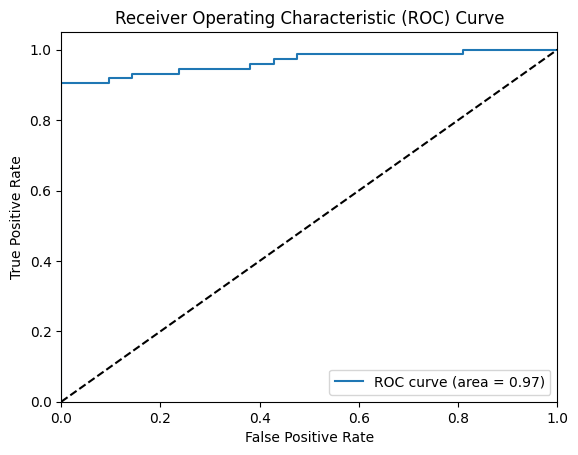

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()